## Data-question-3
### Earthquakes 
- Nate Silver discusses the difficulty of predicting earthquakes in **The Signal and the Noise**, but are there factors that make an earthquake more likely? 
- Are there factors that make an earthquake more deadly? 
- Where would you live if you wanted to eliminate the risk of experiencing an earthquake? 
- Where would you avoid living?

# Team: High Voltage, 
# Members: 
## Team Members:
### - Rachael Abram
### - Bernes Karacay
### - Ashutosh Singhal


#### Data cleaning tasks include:
1. Replace empty strings with NaN
2. Remove the footnotes from the 'Other Source Deaths' column
3. Convert Magnitude to a numeric
4. Create a new column ('deaths') that evaluates the four total-death columns ('PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', and 'Other Source Deaths') and populates the new column with the highest value.
5. Explore the data in terms of when and where earthquakes occurred and how severe they were (magnitude, deaths, secondary effects).

In [1]:
import pandas as pd
import numpy as np

import re
import requests
from bs4 import BeautifulSoup as BS

import datetime
from datetime import datetime

#Matplotlib
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
from matplotlib import style


#Seaborn
import seaborn as sns
# Activate Seaborn
sns.set()
%matplotlib inline

# Treemap
import squarify 

#Altair & Vega and rendering it for notebook
import altair as alt
from altair.expr import datum
from vega_datasets import data
alt.renderers.enable('notebook')

#Folium
import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

In [2]:
earth_quake= pd.read_csv('earthquake_data.csv')

In [3]:
earth_quake.head()

,Unnamed: 0,origin,country,lat,lng,depth,magnitude,secondary_effects,pde_shaking_deaths,pde_total_deaths,utsu_total_deaths,emdat_total_deaths,other_deaths
0,0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,\n
1,1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,\n
2,2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,\n
3,3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,\n
4,4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,\n


In [4]:
earth_quake = earth_quake.drop(['Unnamed: 0'], axis = 1)
earth_quake.head()

,origin,country,lat,lng,depth,magnitude,secondary_effects,pde_shaking_deaths,pde_total_deaths,utsu_total_deaths,emdat_total_deaths,other_deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,\n
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,\n
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,\n
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,\n
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,\n


In [5]:
earth_quake.other_deaths = earth_quake.other_deaths.str[:-1]

In [6]:
#replacing NoneType/blank cells with NaN
earth_quake = earth_quake.replace('', np.NaN)

In [7]:
# converting origin column to date time format
earth_quake['origin'] = pd.to_datetime(earth_quake.origin)

In [8]:
#resolving any weird data errors that have a comma, footnote, or aren't formatted correctly to convert to number

earth_quake.at[43, 'other_deaths'] = 8000
earth_quake.at[66,'other_deaths'] = 164
earth_quake.at[99,'other_deaths'] = 1500
earth_quake.at[1078,'other_deaths'] = 45000
earth_quake.at[1082,'other_deaths'] = 2489
earth_quake.at[1206,'other_deaths'] = 26000
earth_quake.at[1238,'other_deaths'] = 283000
earth_quake.at[1339,'other_deaths'] = 601
earth_quake.at[1338,'other_deaths'] = 111
earth_quake.at[1336,'other_deaths'] = 150
earth_quake.at[1335,'other_deaths'] = 15894
earth_quake.at[1329,'other_deaths'] = 521
earth_quake.at[1328,'other_deaths'] = 221517
earth_quake.at[1318,'other_deaths'] = 60
earth_quake.at[439,'emdat_total_deaths'] = '10'
earth_quake.at[413,'emdat_total_deaths'] = ''
earth_quake.at[958,'other_deaths'] = '33'
earth_quake.at[1327,'other_deaths'] = '1115'
earth_quake.at[1332,'other_deaths'] = '2698'

In [9]:
#earth_quake.iloc[[413, 437, 439,1319,1320,1323,1324,1325,1326,1327,1330,1331,1332,1333,1334,1336]]

In [10]:
#df_earthquake.iloc[(1330)]

In [11]:
earthquake1 = earth_quake.drop([413, 437, 439,1319,1320,1323,1324,1325,1326,1327,1330,1331,1332,1333,1334,1336])

In [12]:
earthquake1.columns

Index(['origin', 'country', 'lat', 'lng', 'depth', 'magnitude',
       'secondary_effects', 'pde_shaking_deaths', 'pde_total_deaths',
       'utsu_total_deaths', 'emdat_total_deaths', 'other_deaths'],
      dtype='object')

In [13]:
type(earthquake1)

pandas.core.frame.DataFrame

In [14]:
earthquake1['lat'] = pd.to_numeric(earthquake1['lat'])
earthquake1['lng'] = pd.to_numeric(earthquake1['lng'])


In [15]:
# Removing alphabet and cleaning up magnitude column
earthquake1.magnitude = earthquake1.magnitude.str[0:3]

In [16]:
#earthquake1.at[438, 'magnitude'] = "5.0"

In [17]:
earthquake1.magnitude = pd.to_numeric(earthquake1.magnitude)

In [18]:
#converting all deaths columns to numeric

earthquake1.pde_shaking_deaths = pd.to_numeric(earthquake1.pde_shaking_deaths)
earthquake1.pde_total_deaths = pd.to_numeric(earthquake1.pde_total_deaths)
earthquake1.utsu_total_deaths = pd.to_numeric(earthquake1.utsu_total_deaths)
earthquake1.emdat_total_deaths = pd.to_numeric(earthquake1.emdat_total_deaths)
earthquake1.other_deaths = pd.to_numeric(earthquake1.other_deaths)


In [19]:
#create a column called total deaths that has the max of the deaths columns and fill 0 in empy rows

earthquake1['total_deaths'] = earthquake1.iloc[:,-5:].max(axis = 1)
earthquake1['total_deaths'] = earthquake1.total_deaths.fillna(0)

In [20]:
#earthquake1.total_deaths.unique()

In [21]:
#Cleaning the 'country' column--removing the parenthesis and whatever inside of it
earthquake1['country'] = earthquake1.country.str.replace(r"\(.*\)","")
earthquake1.country = earthquake1.country.str.replace(r"\(.*","")

#Magnitude is an estimate of the relative "size" or strength of an earthquake, 
and thus its potential for causing ground-shaking. It is "approximately related to the released seismic energy.

In [22]:
earthquake1.head()

,origin,country,lat,lng,depth,magnitude,secondary_effects,pde_shaking_deaths,pde_total_deaths,utsu_total_deaths,emdat_total_deaths,other_deaths,total_deaths
0,1900-05-11 17:23:00,Japan,38.7,141.1,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1900-07-12 06:25:00,Turkey,40.3,43.1,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0
2,1900-10-29 09:11:00,Venezuela,11.0,-66.0,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1901-02-15 00:00:00,China,26.0,100.1,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1901-03-31 07:11:00,Bulgaria,43.4,28.7,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0


In [23]:
#earthquake1['Year'] = earthquake1["origin"].str[:4]
#earthquake1.head()


In [24]:
#earthquake1 = earthquake1[['Year'] + earthquake1.columns[:-2].tolist()]
#earthquake1 = earthquake1[['country'] + earthquake1.columns[:-1].tolist()]

# What magnitude has high frequency in the data 

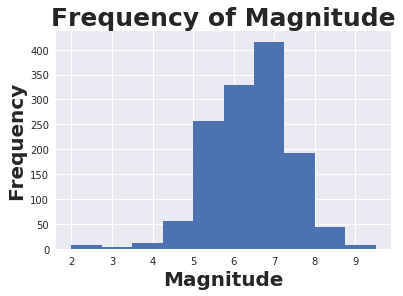

In [25]:
earthquake1.magnitude.hist(bins=10)
plt.title("Frequency of Magnitude", fontweight='bold', size=25)
plt.xlabel('Magnitude', fontweight='bold', size=20)
plt.ylabel('Frequency', fontweight='bold', size=20);

# How magnitude of EQ affects death toll

In [26]:
#earthquake1.columns

In [27]:
eqdata = earthquake1.drop(['depth', 'pde_shaking_deaths','pde_total_deaths',
              'utsu_total_deaths','emdat_total_deaths','other_deaths'], axis = 1)

In [28]:
eqdata.head()

,origin,country,lat,lng,magnitude,secondary_effects,total_deaths
0,1900-05-11 17:23:00,Japan,38.7,141.1,7.0,NaN,0.0
1,1900-07-12 06:25:00,Turkey,40.3,43.1,5.9,NaN,140.0
2,1900-10-29 09:11:00,Venezuela,11.0,-66.0,7.7,NaN,0.0
3,1901-02-15 00:00:00,China,26.0,100.1,6.5,NaN,0.0
4,1901-03-31 07:11:00,Bulgaria,43.4,28.7,6.4,NaN,4.0


In [29]:
eq_below5 = eqdata[eqdata['magnitude'] < 5.0]

In [30]:
eq_5 = eqdata[(eqdata['magnitude'] >= 5.0) & (eqdata['magnitude'] <= 5.9)]

In [31]:
eq_6 = eqdata[(eqdata['magnitude'] >= 6.0) & (eqdata['magnitude'] <= 6.9)]

In [32]:
eq_7 = eqdata[(eqdata['magnitude'] >= 7.0) & (eqdata['magnitude'] <= 7.9)]

In [33]:
eq_8 = eqdata[(eqdata['magnitude'] >= 8.0) & (eqdata['magnitude'] <= 8.9)]

In [34]:
eq_9 = eqdata[(eqdata['magnitude'] >= 9.0) & (eqdata['magnitude'] <= 9.9)]

In [35]:
mag_death = eqdata[(eqdata['magnitude'] >= 6.0)]

In [36]:
mag_vs_death = pd.DataFrame(mag_death.groupby('magnitude')['total_deaths'].sum())

In [37]:
mag_vs_death = mag_vs_death.sort_values('magnitude').reset_index()

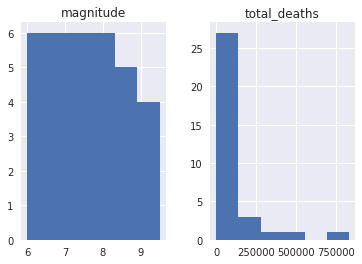

In [38]:
mag_vs_death.hist(bins= 6);

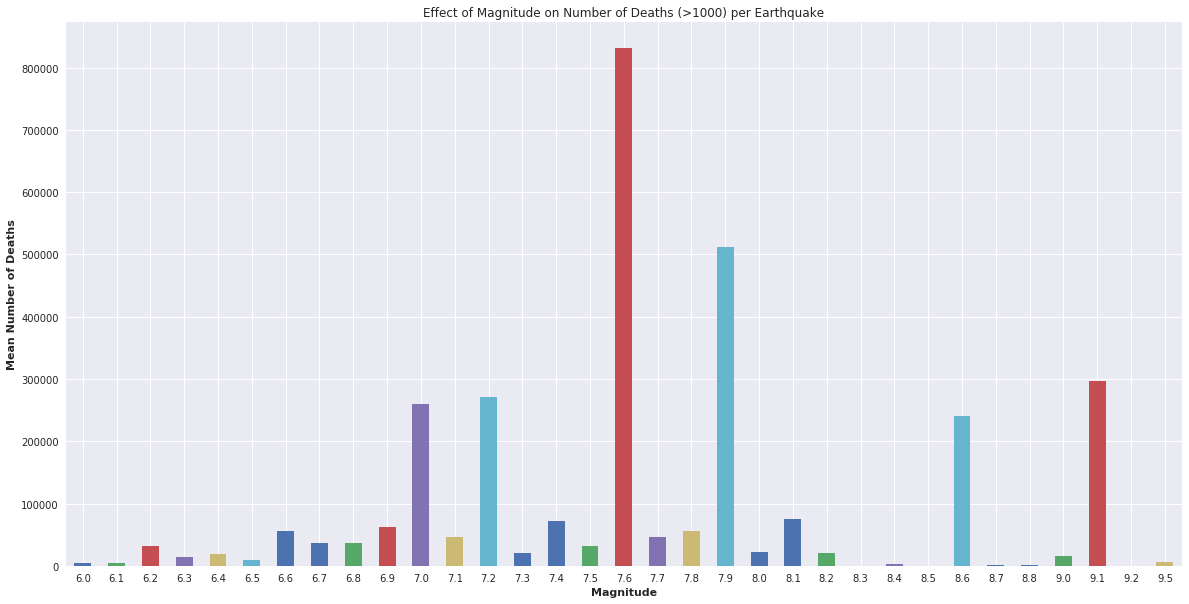

In [39]:
bar_mag_vs_death = mag_vs_death.plot.bar(x='magnitude', y='total_deaths', rot=0, 
                              title ='Effect of Magnitude on Number of Deaths (>1000) per Earthquake', legend = False, 
                          figsize = (20,10))
plt.xlabel('Magnitude', fontweight='bold')
plt.ylabel("Mean Number of Deaths", fontweight='bold')
plt.savefig('EQ1', format='jpg', dpi=300)

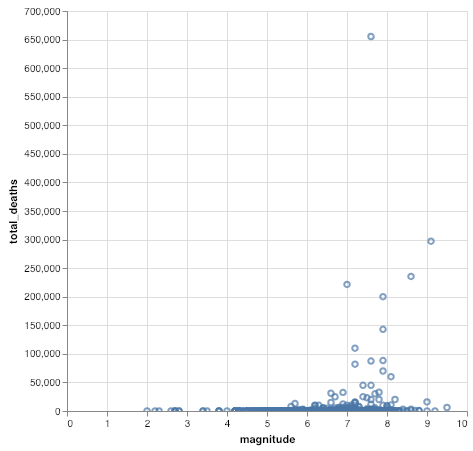

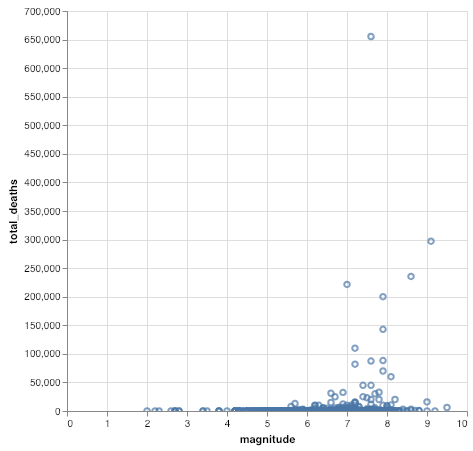

In [40]:
alt.Chart(earthquake1, width= 400, height=400).mark_point().encode(
    x='magnitude',
    y='total_deaths',
).interactive()

In [41]:
#import plotly.plotly as py

In [42]:
#eq_9.total_deaths.sum()

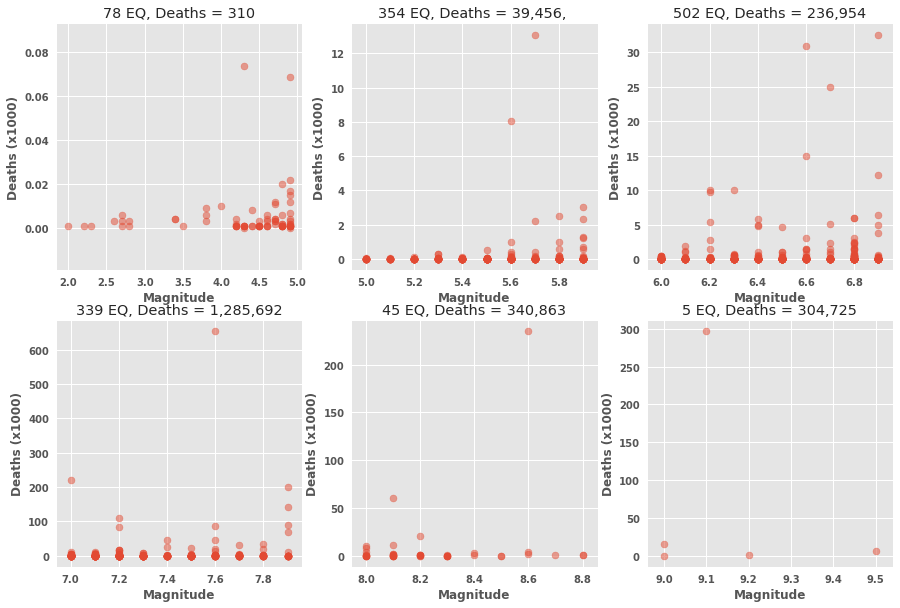

In [43]:
fig = plt.figure(figsize=(15, 10))
plt.style.use('ggplot')
fontsize = 10

ax1 = fig.add_subplot(231)
plt.xlabel("Magnitude", fontweight='bold')
plt.ylabel("Deaths (x1000)", fontweight='bold')
plt.title('78 EQ, Deaths = 310')
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
    
ax2 = fig.add_subplot(232)
plt.xlabel("Magnitude", fontweight='bold')
plt.ylabel("Deaths (x1000)", fontweight='bold')
plt.title('354 EQ, Deaths = 39,456, ')
for tick in ax2.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax2.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
    
ax3 = fig.add_subplot(233)
plt.xlabel("Magnitude", fontweight='bold')
plt.ylabel("Deaths (x1000)", fontweight='bold')
plt.title('502 EQ, Deaths = 236,954')
for tick in ax3.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax3.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
    
ax4 = fig.add_subplot(234)
plt.xlabel("Magnitude", fontweight='bold')
plt.ylabel("Deaths (x1000)", fontweight='bold')
plt.title('339 EQ, Deaths = 1,285,692')
for tick in ax4.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax4.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
    
ax5 = fig.add_subplot(235)
plt.xlabel("Magnitude", fontweight='bold')
plt.ylabel("Deaths (x1000)", fontweight='bold')
plt.title('45 EQ, Deaths = 340,863')
for tick in ax5.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax5.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
    
ax6 = fig.add_subplot(236)
plt.xlabel("Magnitude", fontweight='bold')
plt.ylabel("Deaths (x1000)", fontweight='bold')
plt.title('5 EQ, Deaths = 304,725')
for tick in ax6.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax6.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')

ax1.scatter(eq_below5['magnitude'], eq_below5['total_deaths']/1000, alpha=0.5)
ax2.scatter(eq_5['magnitude'], eq_5['total_deaths']/1000, alpha=0.5)
ax3.scatter(eq_6['magnitude'], eq_6['total_deaths']/1000, alpha=0.5)
ax4.scatter(eq_7['magnitude'], eq_7['total_deaths']/1000, alpha=0.5)
ax5.scatter(eq_8['magnitude'], eq_8['total_deaths']/1000, alpha=0.5)
ax6.scatter(eq_9['magnitude'], eq_9['total_deaths']/1000, alpha=0.5);

plt.savefig('EQ2', format='jpg', dpi=300)

# Most deadly earthquakes and secondary effects on TreeMAP:

In [44]:
# Selecting Earthquakes caused deaths more than 10000
eqdata_deaths = eqdata[(eqdata['total_deaths'] >= 10000)]

In [45]:
# Droping columns no needed for TreeMap
eqdata_sqarify = eqdata_deaths.drop(['origin', 'lat', 'lng'], axis=1)
eqdata_sqarify.head()

,country,magnitude,secondary_effects,total_deaths
24,India,7.8,NaN,20000.0
33,Chile,8.2,T,20000.0
39,Tajikistan,7.2,NaN,15000.0
41,Italy,7.2,T,82000.0
79,Italy,6.9,NaN,32610.0


In [46]:
#replace all NaN in secondary effects to None
eqdata_sqarify['secondary_effects'] = eqdata_sqarify['secondary_effects'].replace(np.NaN,'None')

In [47]:
import matplotlib

In [48]:
# Sorting data based on # of Total Deaths and country
eqdata_sqarify = eqdata_sqarify.sort_values(by=['total_deaths', 'country'], ascending=False)
eqdata_sqarify.head()

,country,magnitude,secondary_effects,total_deaths
583,China,7.6,None,655237.0
1238,Indonesia,9.1,"T,L",297200.0
102,China,8.6,None,235502.0
1328,Haiti,7.0,None,221517.0
140,China,7.9,None,200000.0


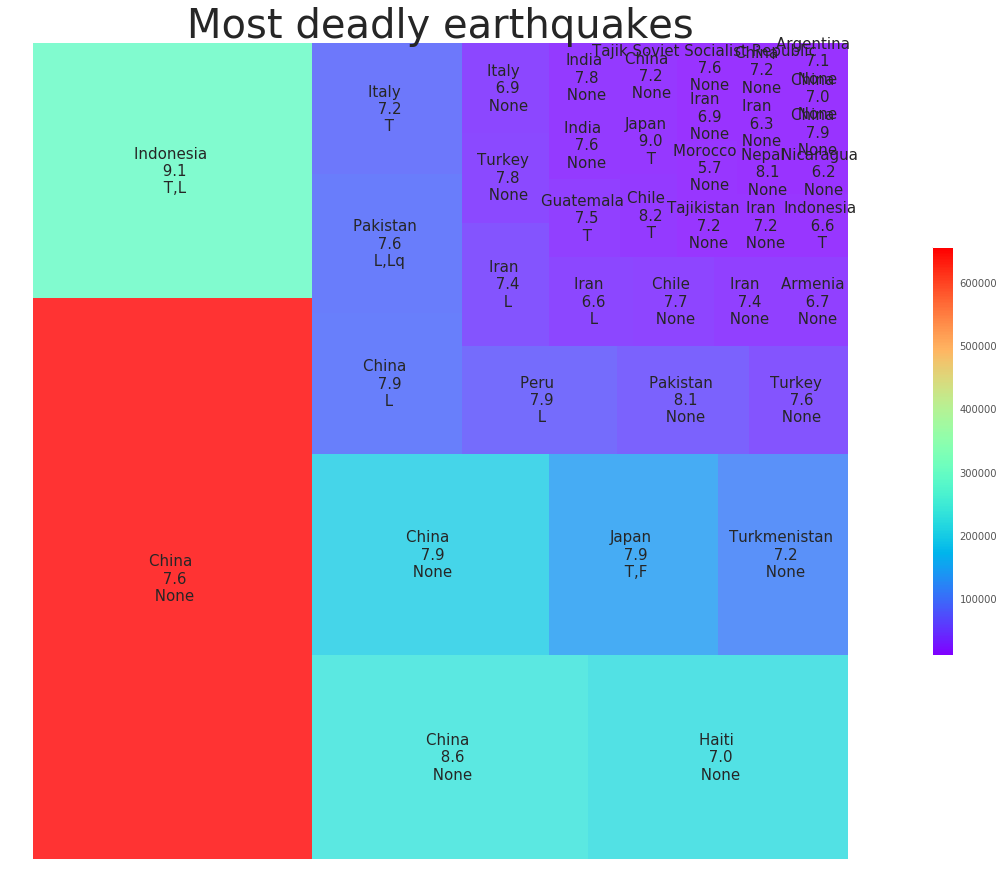

In [49]:
#Creating TreeMap
plt.rcParams['figure.figsize'] = (30,15)
plt.rc('font', size=15)

# Use ggplot style
#style.use('ggplot')

#Colormap
#cmap = matplotlib.cm.YlOrRd
#cmap = matplotlib.cm.rainbow
cmap = matplotlib.cm.rainbow

# Min and Max Values
mini = min(eqdata_sqarify["total_deaths"])
maxi = max(eqdata_sqarify["total_deaths"])

# Create Treemap Labels
eqdata_sqarify["Label"] = eqdata_sqarify["country"] + '\n ' + eqdata_sqarify["magnitude"].astype("str") + '\n ' + eqdata_sqarify["secondary_effects"] 

# Finding Colors for each tile
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in eqdata_sqarify["total_deaths"]]
squarify.plot(sizes=eqdata_sqarify['total_deaths'], label=eqdata_sqarify['Label'], alpha=0.8, color=colors)
plt.axis('off') 
img = plt.imshow([eqdata_sqarify.total_deaths], cmap=cmap)
img.set_visible(False)
plt.colorbar(img, orientation="vertical", shrink=.5)
plt.title("Most deadly earthquakes", fontsize=40)

#plt.text(1, 0, "Source:....", fontsize=20, ha="center")


plt.savefig('treemap-country', format="jpg", dpi= 300)

plt.show()

In [50]:
#import matplotlib.image as mpimg

In [51]:
#img=mpimg.imread("./EQ1")
#imgplot = plt.imshow(img)


# Effect of secondary effects on death toll

In [52]:
# Sorting data based on # of Total Deaths and secondary effects
eqdata_sqarify = eqdata_sqarify.sort_values(by=['total_deaths', 'secondary_effects'], ascending=False)

In [53]:
eqdata_sqarify["Label2"] = eqdata_sqarify["secondary_effects"] + '\n ' + " (" + eqdata_sqarify["magnitude"].astype("str") + " )"

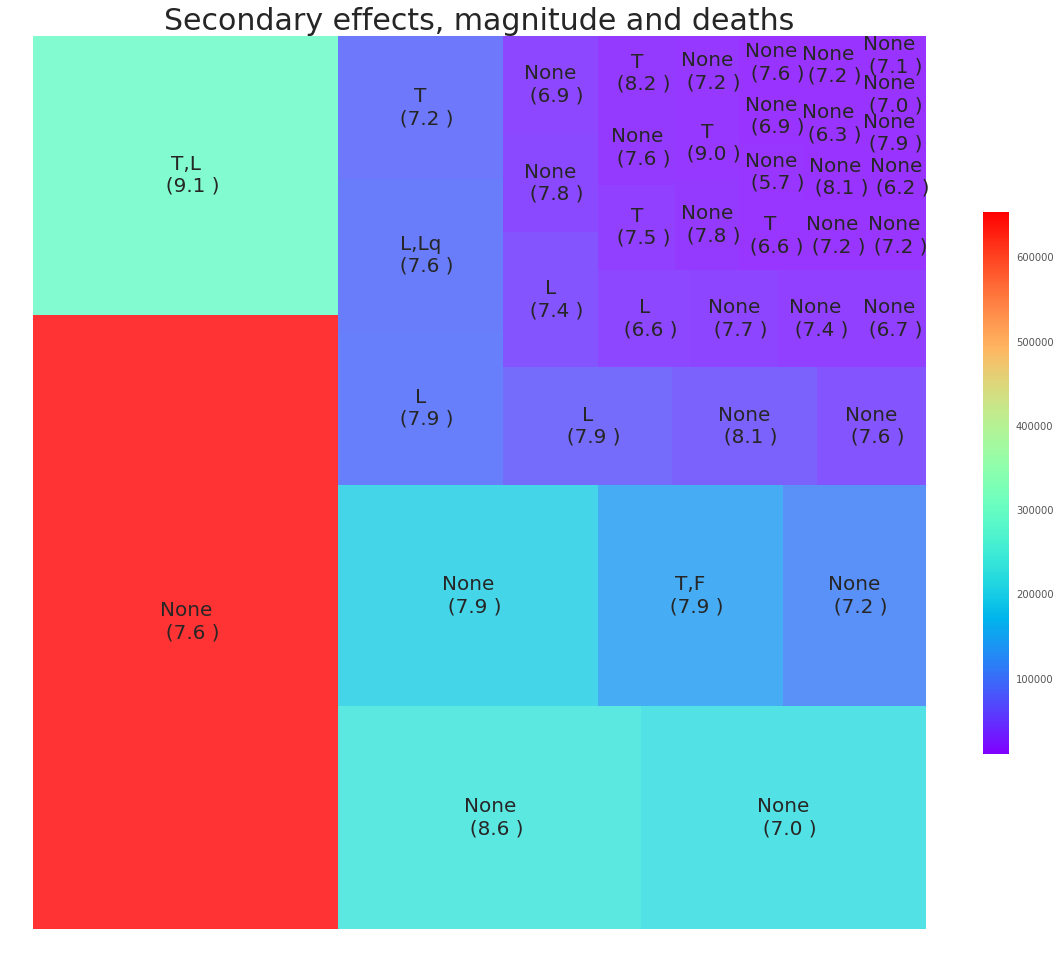

<Figure size 1440x1440 with 0 Axes>

In [54]:
#Creating TreeMap
plt.rcParams['figure.figsize'] = (20,20)
plt.rc('font', size=20)
# Use ggplot style
#style.use('ggplot')
#Colormap
cmap = matplotlib.cm.rainbow
# Min and Max Values
mini = min(eqdata_sqarify["total_deaths"])
maxi = max(eqdata_sqarify["total_deaths"])
# Finding Colors for each tile
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in eqdata_sqarify["total_deaths"]]
squarify.plot(sizes=eqdata_sqarify['total_deaths'], label=eqdata_sqarify['Label2'], alpha=0.8, color=colors)
plt.axis('off') 
img = plt.imshow([eqdata_sqarify.total_deaths], cmap=cmap)
img.set_visible(False)
plt.colorbar(img, orientation="vertical", shrink=.5)
plt.title("Secondary effects, magnitude and deaths", fontsize=30)
#plt.legend("Secondary effects, magnitude and deaths", fontsize=10)
plt.show()
plt.savefig('treemap.jpeg', dpi=300, format='jpeg')

# Time line of earthquakes occured and major deaths between 1990-2011

In [55]:
import altair as alt
from altair.expr import datum
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [56]:
eqdata.head()

,origin,country,lat,lng,magnitude,secondary_effects,total_deaths
0,1900-05-11 17:23:00,Japan,38.7,141.1,7.0,NaN,0.0
1,1900-07-12 06:25:00,Turkey,40.3,43.1,5.9,NaN,140.0
2,1900-10-29 09:11:00,Venezuela,11.0,-66.0,7.7,NaN,0.0
3,1901-02-15 00:00:00,China,26.0,100.1,6.5,NaN,0.0
4,1901-03-31 07:11:00,Bulgaria,43.4,28.7,6.4,NaN,4.0


In [57]:
eqdata['country'] = eqdata['country'].replace('India ','India')

In [58]:
eqdata['country'] = eqdata['country'].replace('Indonesia ','Indonesia')
eqdata['country'] = eqdata['country'].replace('Japan ','Japan')
eqdata['country'] = eqdata['country'].replace('China ','China')
eqdata['country'] = eqdata['country'].replace('Yemen ','Yemen')
eqdata['country'] = eqdata['country'].replace('Peru ','Peru')
eqdata['country'] = eqdata['country'].replace('Turkey ','Turkey')
eqdata['country'] = eqdata['country'].replace('Iran ','Iran')
eqdata['country'] = eqdata['country'].replace('Mexico ','Mexico')
eqdata['country'] = eqdata['country'].replace('Algeria ','Algeria')
eqdata['country'] = eqdata['country'].replace('Ecuador ','Ecuador')

In [59]:
eqdata.head()

,origin,country,lat,lng,magnitude,secondary_effects,total_deaths
0,1900-05-11 17:23:00,Japan,38.7,141.1,7.0,NaN,0.0
1,1900-07-12 06:25:00,Turkey,40.3,43.1,5.9,NaN,140.0
2,1900-10-29 09:11:00,Venezuela,11.0,-66.0,7.7,NaN,0.0
3,1901-02-15 00:00:00,China,26.0,100.1,6.5,NaN,0.0
4,1901-03-31 07:11:00,Bulgaria,43.4,28.7,6.4,NaN,4.0


In [60]:
eqalt = eqdata.drop(['lat', 'lng','magnitude',
              'secondary_effects'], axis = 1)
eqalt.head()

,origin,country,total_deaths
0,1900-05-11 17:23:00,Japan,0.0
1,1900-07-12 06:25:00,Turkey,140.0
2,1900-10-29 09:11:00,Venezuela,0.0
3,1901-02-15 00:00:00,China,0.0
4,1901-03-31 07:11:00,Bulgaria,4.0


In [61]:
eqalt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324 entries, 0 to 1339
Data columns (total 3 columns):
origin          1324 non-null datetime64[ns]
country         1324 non-null object
total_deaths    1324 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 41.4+ KB


In [62]:
#eqalt.origin = str(eqalt.origin)
eqalt.origin = eqalt.origin.astype(str)
eqalt.head()

,origin,country,total_deaths
0,1900-05-11 17:23:00,Japan,0.0
1,1900-07-12 06:25:00,Turkey,140.0
2,1900-10-29 09:11:00,Venezuela,0.0
3,1901-02-15 00:00:00,China,0.0
4,1901-03-31 07:11:00,Bulgaria,4.0


In [63]:
#eqalt['Year'] = eqalt['origin'].astype(str).str[:4]
eqalt['Year'] = eqalt['origin'].str[:4]
eqalt.head()

,origin,country,total_deaths,Year
0,1900-05-11 17:23:00,Japan,0.0,1900
1,1900-07-12 06:25:00,Turkey,140.0,1900
2,1900-10-29 09:11:00,Venezuela,0.0,1900
3,1901-02-15 00:00:00,China,0.0,1901
4,1901-03-31 07:11:00,Bulgaria,4.0,1901


In [64]:
cyd = eqalt.drop(['origin'], axis = 1)
cyd.head()

,country,total_deaths,Year
0,Japan,0.0,1900
1,Turkey,140.0,1900
2,Venezuela,0.0,1900
3,China,0.0,1901
4,Bulgaria,4.0,1901


In [83]:
# Selecting Earthquakes caused deaths more than 10000
cyd1 = cyd[(cyd['total_deaths'] >= 1000)]
cyd1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 10 to 1335
Data columns (total 3 columns):
country         133 non-null object
total_deaths    133 non-null float64
Year            133 non-null object
dtypes: float64(1), object(2)
memory usage: 4.2+ KB


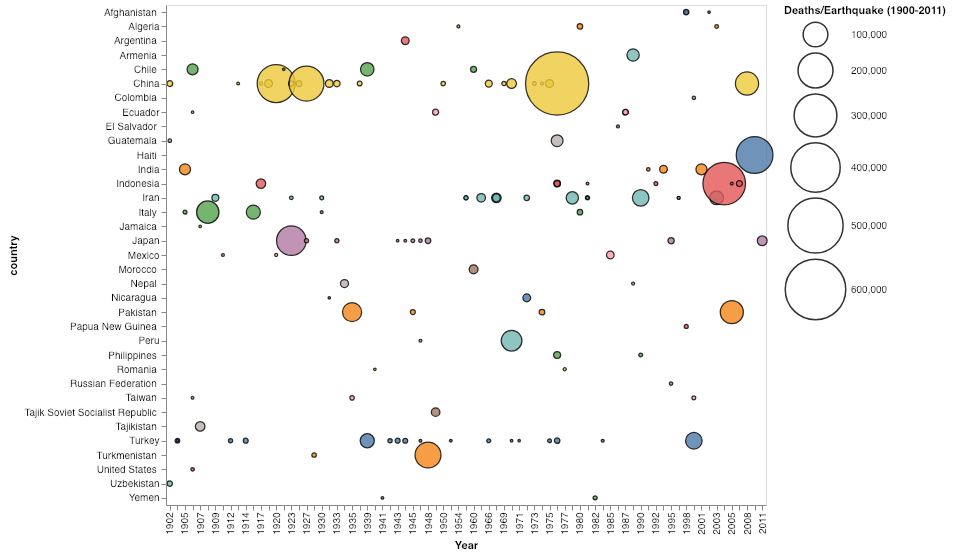

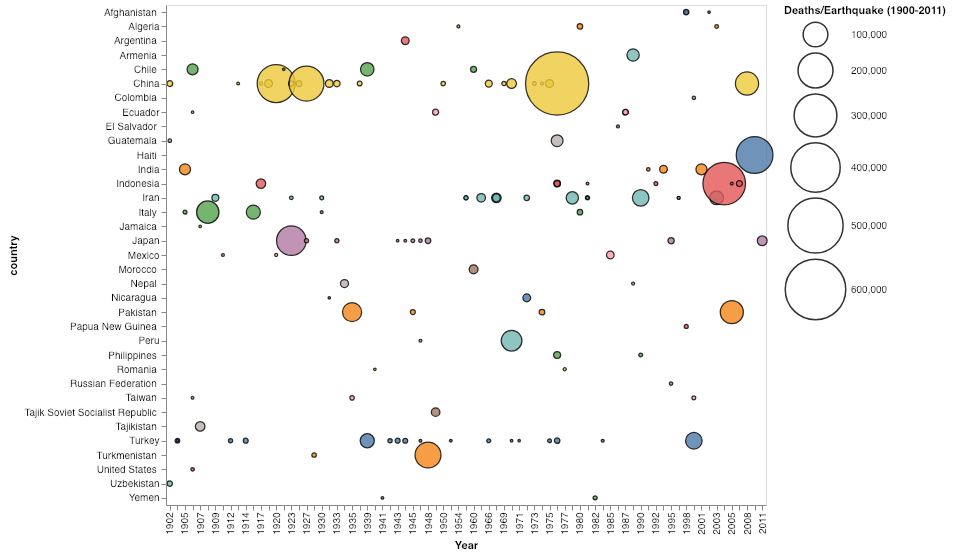

In [84]:
#source1= deaths >10000
source1 = cyd1
source1
alt.Chart(source1).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1.25,
).encode(
    alt.X('Year:O', axis=alt.Axis(labelAngle=270)),
    alt.Y('country:N'),
    alt.Size('total_deaths:Q',
        scale=alt.Scale(range=[0, 4000]),
        legend=alt.Legend(title='Deaths/Earthquake (1900-2011)')
    ),
    alt.Color('country:N', legend=None)
).properties(
    width=600,
    height=500
).transform_filter(
    datum.country != 'Death due to Earthquake'
)


# Earthquake on the world map

In [67]:
eqdata_deaths.head()

,origin,country,lat,lng,magnitude,secondary_effects,total_deaths
24,1905-04-04 00:50:00,India,33.0,76.0,7.8,NaN,20000.0
33,1906-08-17 00:40:00,Chile,-33.0,-72.0,8.2,T,20000.0
39,1907-10-21 04:23:00,Tajikistan,38.0,69.0,7.2,NaN,15000.0
41,1908-12-28 04:20:00,Italy,38.0,15.5,7.2,T,82000.0
79,1915-01-13 06:52:00,Italy,42.0,13.5,6.9,NaN,32610.0


In [344]:
eqdata_deaths.loc[eqdata_deaths.country == 'Haiti ']

,origin,country,lat,lng,magnitude,secondary_effects,total_deaths
1328,2010-01-12 17:00:00,Haiti,18.457,-72.533,7.0,NaN,221517.0


In [345]:
eqdata_deaths.at[1328,'magnitude'] = 7.01

In [346]:
url_base = 'http://server.arcgisonline.com/ArcGIS/rest/services/'
service = 'NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}'

tileset = url_base + service

map_2 = folium.Map(location=[0, 0], zoom_start=3,\
        control_scale = True, tiles=tileset, attr='USGS style')
    
for row in eqdata_deaths.iterrows():
    row_values = row[1]
    location = [row_values['lat'], row_values['lng']]
    
    marker = folium.CircleMarker(location=location, radius=3, color='red')
    marker.add_to(map_2)
    
    def color(magnitude):
    
        if magnitude<5.0:
            col='yellow'
        elif ((magnitude>5.0)&(magnitude<6.0)):
            col='green'
        elif ((magnitude>6.0)&(magnitude<7.0)):
            col='blue'
        elif ((magnitude>7.0)&(magnitude<8.0)):
            col='pink'
        else:
            col='red'
        return col

map_2.add_child(MarkerCluster(locations=list(zip(eqdata_deaths['lat'], 
                                 eqdata_deaths['lng'])),
                                 popups= 'Magnitude: ' + eqdata_deaths['magnitude'].astype(str) + '<br> ' + 'Deaths: ' 
                              + eqdata_deaths['total_deaths'].astype(str),
                                 icons=[color(m) for m in eqdata_deaths['magnitude']]))
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(map_2)
map_2

In [347]:
eqdata_deaths.head()

,origin,country,lat,lng,magnitude,secondary_effects,total_deaths
24,1905-04-04 00:50:00,India,33.0,76.0,7.8,NaN,20000.0
33,1906-08-17 00:40:00,Chile,-33.0,-72.0,8.2,T,20000.0
39,1907-10-21 04:23:00,Tajikistan,38.0,69.0,7.2,NaN,15000.0
41,1908-12-28 04:20:00,Italy,38.0,15.5,7.2,T,82000.0
79,1915-01-13 06:52:00,Italy,42.0,13.5,6.9,NaN,32610.0


# Heat MAP

In [348]:
import selenium
from selenium import webdriver

In [414]:
url_base = 'http://server.arcgisonline.com/ArcGIS/rest/services/'
service = 'NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}'

tileset = url_base + service

map_3 = folium.Map(location=[0, 0], zoom_start=5,\
        control_scale = True, tiles=tileset, attr='USGS style')
    
for row in eqdata_deaths.iterrows():
    row_values = row[1]
    location = [row_values['lat'], row_values['lng']]
    
    #marker = folium.CircleMarker(location=location, radius=3, color='red')
    #marker.add_to(map_2)
    
    def color(magnitude):
    
        if magnitude<5.0:
            col='yellow'
        elif ((magnitude>5.0)&(magnitude<6.0)):
            col='green'
        elif ((magnitude>6.0)&(magnitude<7.0)):
            col='blue'
        elif ((magnitude>7.0)&(magnitude<8.0)):
            col='pink'
        else:
            col='red'
        return col

map_3.add_child(MarkerCluster(locations=list(zip(eqdata_deaths['lat'], 
                                 eqdata_deaths['lng'])),
                                 popups= 'Magnitude : ' + eqdata_deaths['magnitude'].astype(str) + '<br> ' + 'Deaths : ' 
                              + eqdata_deaths['total_deaths'].astype(str) + '<br> ' + 'Year: ' 
                              + eqdata_deaths['origin'].astype(str),
                                 icons=[color(m) for m in eqdata_deaths['magnitude']]))
# List comprehension to make out list of lists
eqdata_data = [[row['lat'],row['lng']] for index, row in eqdata_deaths.iterrows()]

# Plot it on the map
HeatMap(eqdata_data).add_to(map_3)


plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(map_3)

map_3
